In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd

In [3]:
# load the data
df= pd.read_csv('/content/drive/MyDrive/Dataset/BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [6]:
# in facebook prophet the columns always needs to be called:
# ds for date column
# y for variable column

In [7]:
df.columns=['ds','y']

In [8]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [9]:
# make sure ds column is pandas date time object
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [12]:
# by default profit will expect a daily data
# so when we provide monthly daat it will Disable weekly and monthly seasonality 
m= Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
#Future placeholder to hold our future pred

y_pred = m.make_future_dataframe(periods=24,freq='MS')

In [14]:
y_pred

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [15]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [16]:
y_pred.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [17]:
print(len(df))

print('Length of Predicted dataset')

print(len(y_pred))

324
Length of Predicted dataset
348


In [18]:
# Predicting and filling in the data.
forecast= m.predict(y_pred)


In [19]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1144.359483,1470.299347,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1199.323302,1522.193958,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1453.407290,1768.894312,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1437.740829,1746.868790,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1659.583561,2000.977300,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [20]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [21]:
forecast_required=forecast[['ds','yhat_lower', 'yhat_upper','yhat']]

In [22]:
forecast_required.tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4474.230514,4790.681390,4628.559148
337,2020-02-01,4518.826389,4826.882648,4679.231311
338,2020-03-01,4782.890764,5107.052666,4942.493052
339,2020-04-01,4775.095776,5104.535083,4941.412350
340,2020-05-01,5030.708046,5349.945850,5198.212046
341,2020-06-01,5017.231720,5339.050660,5178.840512
342,2020-07-01,5143.064295,5469.159202,5311.075537
343,2020-08-01,5076.319396,5405.977089,5240.612763
344,2020-09-01,4930.422211,5257.456239,5083.379410
345,2020-10-01,5012.954931,5349.812594,5188.922115


In [23]:
forecast_required.head()

,ds,yhat_lower,yhat_upper,yhat
0,1992-01-01,1144.359483,1470.299347,1312.757569
1,1992-02-01,1199.323302,1522.193958,1350.176031
2,1992-03-01,1453.407290,1768.894312,1601.039150
3,1992-04-01,1437.740829,1746.868790,1586.704747
4,1992-05-01,1659.583561,2000.977300,1830.678281


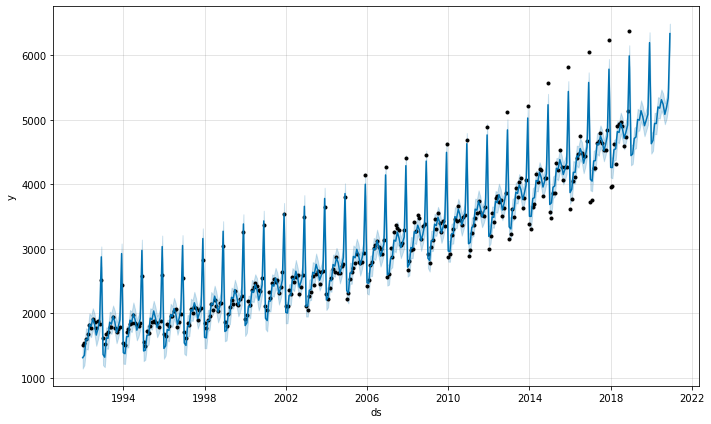

In [24]:
m.plot(forecast_required);

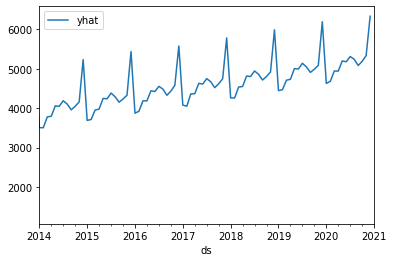

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
forecast_required.plot(x='ds',y='yhat',xlim=('2014-01-01','2021-01-01'))

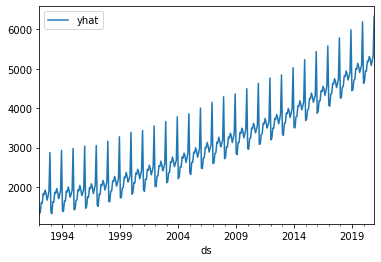

In [38]:
forecast_required.plot(x='ds',y='yhat')

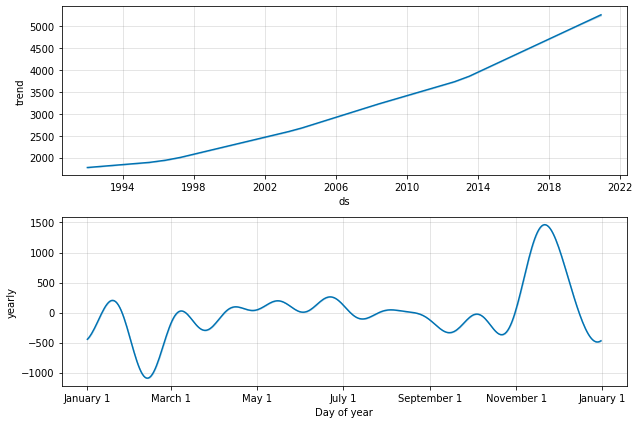

In [42]:
m.plot_components(forecast);